# Installing python pandas library

In [1]:
!pip install pandas

# importing library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

# Reading the data


In [4]:
df = pd.read_csv('C:\project2\Comcast_telecom_complaints_data.csv')

# Null count

In [5]:
df[df.isnull()].count()
df.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,113,91,2190,2,928,43,NaN,4,2
top,250635,Comcast,24-06-2015,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,216,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


## Provide the trend chart for the number of complaints at monthly  levels.

<AxesSubplot:xlabel='date_index'>

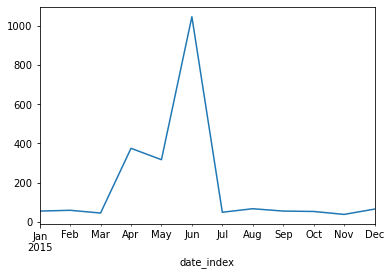

In [6]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])
df = df.set_index(df["date_index"])
df["Date_month_year"].value_counts()[:3]
df.groupby(pd.Grouper(freq="M")).size().plot()

## Provide the trend chart for the number of complaints at Daily levels.

(0.0, 34.0)

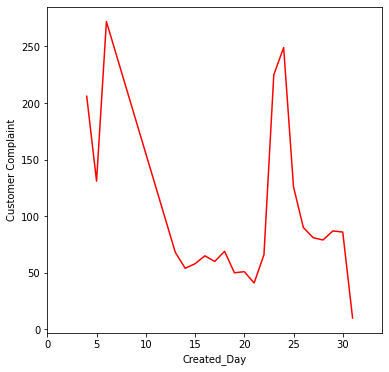

In [7]:
df['Created_Day'] = df['Date_month_year'].apply(lambda x: x.day)
plt.figure(figsize=(6,6))
totalday = df.groupby('Created_Day').count().reset_index()
lp = sns.lineplot(x='Created_Day', y= 'Customer Complaint', data = totalday, sort=False, color = 'red',markers = "o", )
ax = lp.axes
ax.set_xlim(0,34)

# Showing Status in bar chart

<AxesSubplot:>

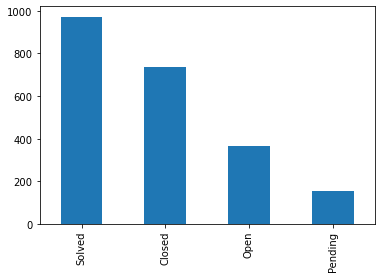

In [8]:
df.Status.value_counts().plot(kind='bar')

#  Create a new categorical variable with value as Open and Closed

In [9]:
df['Highest_State'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]
df['Highest_State'].unique()
df['Highest State'] = df['State'].str.title() 
st_cmp = df.groupby(['Highest State','Highest_State']).size().unstack().fillna(0)

#  Provide state wise status of complaints in a stacked bar chart and Highest Complaint

,Complaint count
Highest State,
Georgia,288


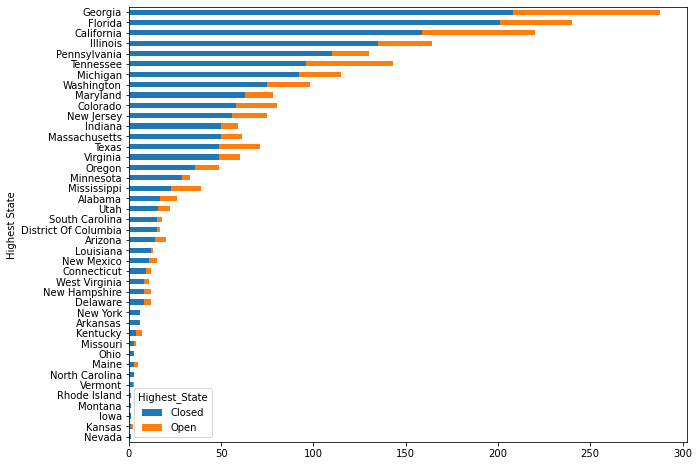

In [10]:
st_cmp.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(10,8), stacked=True)
df.groupby(["Highest State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]


# state has the highest percentage of unresolved complaints

In [11]:
CT = df.groupby(["Highest State","Highest_State"]).size().unstack().fillna(0)
CT.sort_values('Closed',axis = 0,ascending=False)[:1]
CT['Resolved_cmp_prct'] = CT['Closed']/CT['Closed'].sum()*100
CT['Unresolved_cmp_prct'] = CT['Open']/CT['Open'].sum()*100
CT.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:1]

Highest_State,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
Highest State,,,,
Georgia,208.0,80.0,12.18512,15.473888


# percentage of complaints resolved till date

In [12]:
cr = df.groupby(['Received Via','Status']).size().unstack().fillna(0)
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']

Received Via
Customer Care Call    52.724796
Internet              47.275204
Name: resolved, dtype: float64

# Provide a table with the frequency of complaint types.

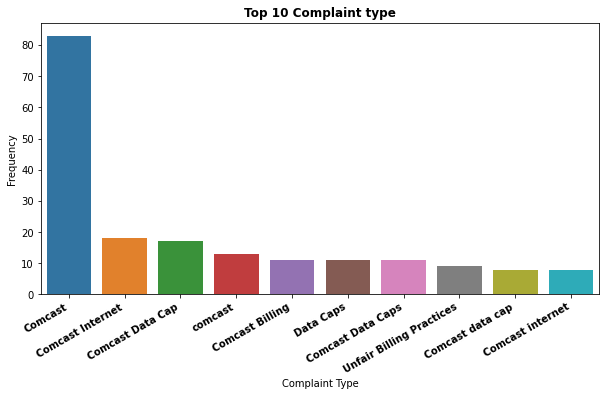

In [13]:
Complaint_Type = df['Customer Complaint'].value_counts().to_frame().reset_index().rename(columns={
    'index':'Complaint Type','Customer Complaint':'Frequency'})
Complaint_Type
plt.figure(figsize=(10,5))
comp = sns.barplot(x=Complaint_Type['Complaint Type'].head(10),y=Complaint_Type.Frequency.head(10))
comp.set_title('Top 10 Complaint type',weight='bold')
comp.set_xticklabels(comp.get_xticklabels(), rotation=30, ha="right",size=10,weight='bold')
plt.show()

# complaint types are maximum

In [14]:
Complaint_Type[(Complaint_Type.Frequency*100)/Complaint_Type.Frequency.sum() >= .5]

,Complaint Type,Frequency
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
